In [97]:
import numpy as np
import matplotlib.pyplot as plt

PLU

In [98]:
def Perm_Row(A, i, j):
    B = np.copy(A)
    A[i], A[j] = B[j], B[i]
    return A

def Ind_max(A, ind):
    return np.argmax(np.abs(A[:, ind][ind:]))+ind

def PLU(A):
    m, n = np.shape(A)
    P = np.eye(n)
    L = np.zeros((n, n))
    U = np.copy(A)
    if m != n:
        return print("La matriz no es cuadrada.")
    for j in range(n-1):
        index = Ind_max(U, j)
        L = Perm_Row(L, j, index)
        U = Perm_Row(U, index, j)
        P = Perm_Row(P, index, j)
        for i in range(j+1, n):
            L[i][j] = U[i][j]/U[j][j]
            U[i] = U[i] - L[i][j]*U[j]
    L += np.eye(n)
    return P, L, U

def Solv_L(L, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n):
        y[i] = b[i]
        for k in range(i):
            y[i] -= L[i][k]*y[k]
        y[i] = y[i]/L[i][i]
    return y

def Solv_U(U, b):
    n = len(b)
    y = np.zeros(n)
    for i in range(n-1, -1, -1):
        y[i] = b[i]
        for k in range(i+1, n):
            y[i] -= U[i][k]*y[k]
        y[i] = y[i]/U[i][i]
    return y

def Solv_PLU(A, b):
    P, L, U = PLU(A)
    b = P@b
    y = Solv_L(L, b)
    x = Solv_U(U, y)
    return x

Vandermonde

Datos $\in \mathbb{R}^{m \times 2}$

Datos $[:,0] =X$

Datos $[:,1] =y$ 

$V^TVa = V^T y $

$ Va = y$

In [99]:
def vandermonde(X, grado): # m = grado + 1
    m = len(X)
    V = np.zeros((m, grado+1))
    V[:,0] = np.ones(m)
    for i in range(1, grado+1):
        V[:,i] = X**i
    return V

$P(x)=\sum_{k=0}^{\text{grado}}a_x x^k$

In [100]:
def coef_pol(datos, grado):
    V = vandermonde(datos[:,0], grado)
    a = Solv_PLU(V.T@V, V.T@datos[:,1])
    return a

$f(x) = pol\_eval(a, x)$

In [101]:
def pol_eval(a, x):
    suma=0
    m = len(a)
    for i in range(m):
        suma += a[i]*x**i
    return suma

In [102]:
def gen_puntos(a, b, f):
    x = np.linspace(a, b, 4)
    y = f(x)
    datos = np.vstack((x, y)).T
    return datos

Método de Simpson

$\int_a^b f \approx \int_a^b P$, donde

$P(x) = \sum_{k=0}^3 a_k x^k = a_0 + a_1x + a_2 x^2 + a_3 x^3$

es el polinomio que interpola a $f$ en los puntos $a, \frac{b-a}{3}, \frac{2}{3}(b-a), b$

$\int_a^b f = a_0(b-a) + \frac{a_1}{2}(b^2-a^2) + \frac{a_2}{3}(b^3-a^3) + \frac{a_3}{4}(b^4-a^4)$

In [103]:
def int_simpson(a, b, f):
    datos = gen_puntos(a, b, f)
    c = coef_pol(datos, 3)
    suma = 0
    for i in range(4):
        suma += c[i] * (b**(i+1) - a**(i+1))/(i+1)
    return suma

Simpson compuesto

$ \{ a = t_0, t_1, ..., t_n \} $

$\int_b^a f \approx \sum_{k=1}^{n} \int_{t_{i-1}}^{t_i} P_i$,

donde $P_i$ es el polinomio de grado 3 que interpola a $f$ en el intervalo $[t_{i-1}, t_i]$.

In [104]:
def int_simpson_comp(a, b, f, n):
    part = np.linspace(a, b, n+1)
    suma = 0
    for i in range(n):
        suma += int_simpson(part[i], part[i+1], f)
    return suma

Ejemplo:

$f(x) = e^{-x^2}$ 

$\int_{- \infty}^{\infty}f=\sqrt{\pi}$

$\int_{- \infty}^{\infty}f= \int_{-m}^{m}f$

In [105]:
def f(x):
    return np.e ** (-(x**2))

In [106]:
I = int_simpson_comp(-10, 10, f, 100) # Variar m

$\text{Error}=|\sqrt{\pi} - \int_{-m}^{m}f|$

In [107]:
error = np.abs(I - np.sqrt(np.pi))
print("El valor de la integral es: ", I)
print("El error es: ", error)

El valor de la integral es:  1.7724538509051666
El error es:  3.4927616354707425e-13


Ejemplo:

$\ln (x) = \int_1^x \frac{1}{t} dt$

In [108]:
def f2(t):
    return 1/t

In [109]:
def log_exp(x):
    return int_simpson_comp(1, x, f2, 400)

Grafica

In [110]:
equises = np.linspace(1.1, 100, 100)
yes = np.log(equises)
yes2 = []
for x in equises:
    yes2.append(log_exp(x))

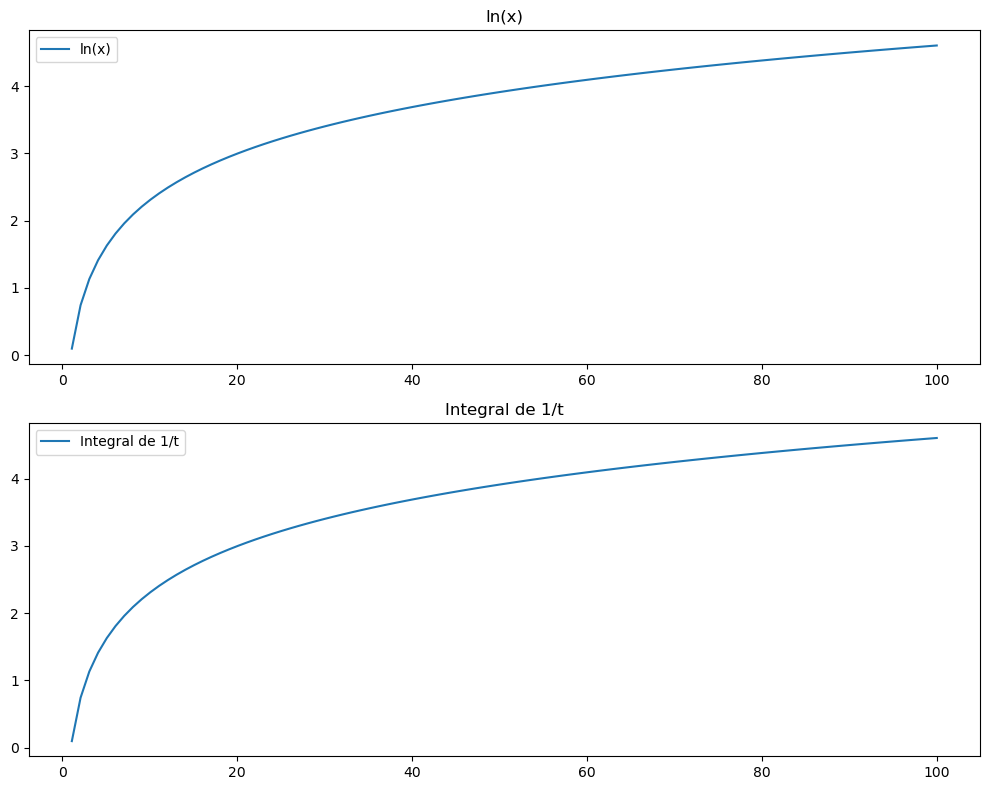

In [111]:
import matplotlib.pyplot as plt

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first graph on the first subplot
ax1.plot(equises, yes, label="ln(x)")
ax1.legend()
ax1.set_title("ln(x)")

# Plot the second graph on the second subplot
ax2.plot(equises, yes2, label="Integral de 1/t")
ax2.legend()
ax2.set_title("Integral de 1/t")

# Display the subplots
plt.tight_layout()
plt.show()

Ejemplo:

$\rho(x) = \frac{1}{\sqrt{4\pi}}e^{-\frac{(x-\mu)^2}{2}}$

$\int_a^b \rho(x) dx = P(x) \text{ en } [a,b]$

$\mu = 0, \sigma = 1$

$min(sample) = a$

$max(sample) = b$

$\int_a^\mu \rho = 0.5$

$y_i = frecuencia en [t_{i-1}, t_i]$

$X = linspace(a,b,51)$

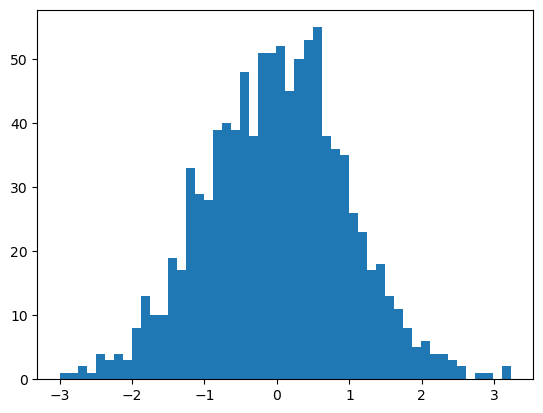

In [115]:
sample = np.random.normal(size=1000)
y, X = np.histogram(sample, bins=50)
plt.stairs(y, X, fill=True)
plt.show()

In [ ]:
def gen_puntos_2(a, b, f):
    x = np.linspace(a, b, 4)
    y = f(x)
    datos = np.vstack((x, y)).T
    return datos